In [180]:
# Modul Dasar
import numpy as np               # Operasi matematika dan array
import pandas as pd              # Struktur data tabular (DataFrame)
import matplotlib.pyplot as plt  # Visualisasi data
import seaborn as sns            # Visualisasi data tambahan

# Statistik dan Machine Learning
from scipy import stats          # Statistikaa
from sklearn import datasets     # Datasets untuk machine learning
from sklearn.model_selection import train_test_split  # Pembagian data train-test
from sklearn.preprocessing import StandardScaler     # Normalisasi data
from sklearn.linear_model import LinearRegression    # Regresi linear
from sklearn.tree import DecisionTreeClassifier      # Klasifikasi menggunakan Decision Tree
from sklearn.cluster import KMeans                    # KMeans clustering

# Evaluasi Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluasi performa model

# Visualisasi Machine Learning
from sklearn.tree import plot_tree    # Visualisasi struktur Decision Tree
from sklearn.metrics import roc_curve, auc  # Kurva ROC dan AUC


from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [181]:
import numpy as np
import tensorflow as tf

# Set seed for numpy
np.random.seed(42)

# Set seed for TensorFlow
tf.random.set_seed(42)


In [242]:
data = pd.read_csv("../data/external/14tahun.csv")
# data = pd.read_csv("../data/external/5 tahun.csv")
data.head(5)

,Tanggal,Terakhir,Pembukaan,Tertinggi,Terendah,Vol.,Perubahan%
0,02/10/2024,"7.527,98","7.598,03","7.618,93","7.521,71","23,44B","-1,49%"
1,01/10/2024,"7.642,13","7.551,46","7.642,13","7.547,11","20,70B","1,52%"
2,30/09/2024,"7.527,93","7.674,29","7.679,24","7.527,93","22,22B","-2,20%"
3,27/09/2024,"7.696,92","7.713,80","7.736,92","7.663,48","19,05B","-0,61%"
4,26/09/2024,"7.744,52","7.723,10","7.763,08","7.673,05","20,28B","0,05%"


In [243]:
data.columns

Index(['Tanggal', 'Terakhir', 'Pembukaan', 'Tertinggi', 'Terendah', 'Vol.',
       'Perubahan%'],
      dtype='object')

In [244]:
lengh_data = len(data)
split_ratio = 0.9
lengh_train = round(lengh_data * split_ratio)
lengh_validation = lengh_data - lengh_train

In [245]:
data = data.drop(["Vol.","Perubahan%"],axis=1)
data['Tanggal'] = pd.to_datetime(data['Tanggal'],dayfirst=True)
data = data.set_index("Tanggal")


def convert_to_float(series):
    return series.str.replace('.', '', regex=False).str.replace(',', '.', regex=False).astype(float)

# Terapkan konversi ke kolom "Terakhir", "Pembukaan", "Tertinggi", dan "Terendah"
data['Terakhir'] = convert_to_float(data['Terakhir'])
data['Pembukaan'] = convert_to_float(data['Pembukaan'])
data['Tertinggi'] = convert_to_float(data['Tertinggi'])
data['Terendah'] = convert_to_float(data['Terendah'])



#hai widha

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3604 entries, 2024-10-02 to 2010-01-04
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Terakhir   3604 non-null   float64
 1   Pembukaan  3604 non-null   float64
 2   Tertinggi  3604 non-null   float64
 3   Terendah   3604 non-null   float64
dtypes: float64(4)
memory usage: 140.8 KB


In [247]:
def time_series_to_supervised(data, n_in=1, n_out=1, dropnan=True, var_names=None):
    """
    Mengubah data time series menjadi data supervised learning.

    Argumen:
    data: DataFrame, dataset time series yang akan diubah.
    n_in: int, jumlah timestep mundur sebagai input (X).
    n_out: int, jumlah timestep maju sebagai output (y).
    dropnan: bool, apakah akan menghapus baris dengan nilai NaN.
    var_names: list of str, nama variabel untuk setiap kolom.

    Returns:
    DataFrame yang sudah diubah menjadi format supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = [], []
    
    # Input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        if var_names is None:
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        else:
            names += [(var_names[j] + '(t-%d)' % i) for j in range(n_vars)]
    
    # Output sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            if var_names is None:
                names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
            else:
                names += [(var_names[j] + '(t)') for j in range(n_vars)]
        else:
            if var_names is None:
                names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            else:
                names += [(var_names[j] + '(t+%d)' % i) for j in range(n_vars)]
    
    # Concatenate semua kolom
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # Hapus baris dengan nilai NaN
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg

# Contoh penggunaan:
# Misalkan 'data' adalah DataFrame yang berisi data time series
# dengan tiga fitur, dan kita ingin menggunakan 3 timestep mundur sebagai input
# dan 1 timestep maju sebagai output, dan nama variabel untuk setiap fitur adalah
# 'A', 'B', dan 'C'

var_names = data.columns
data_supervised = time_series_to_supervised(data, n_in=3, n_out=1, var_names=var_names)


In [248]:
train_data = data_supervised[lengh_validation:]
validation_data = data_supervised[:lengh_validation]

In [249]:
lengh_train

3244

In [250]:
train_data

,Terakhir(t-3),Pembukaan(t-3),Tertinggi(t-3),Terendah(t-3),Terakhir(t-2),Pembukaan(t-2),Tertinggi(t-2),Terendah(t-2),Terakhir(t-1),Pembukaan(t-1),Tertinggi(t-1),Terendah(t-1),Terakhir(t),Pembukaan(t),Tertinggi(t),Terendah(t)
Tanggal,,,,,,,,,,,,,,,,
2023-03-20,6708.93,6762.25,6772.60,6704.75,6762.25,6694.02,6776.90,6692.17,6691.61,6612.49,6691.61,6609.22,6612.49,6678.24,6678.24,6587.69
2023-03-17,6762.25,6694.02,6776.90,6692.17,6691.61,6612.49,6691.61,6609.22,6612.49,6678.24,6678.24,6587.69,6678.24,6565.73,6683.09,6565.73
2023-03-16,6691.61,6612.49,6691.61,6609.22,6612.49,6678.24,6678.24,6587.69,6678.24,6565.73,6683.09,6565.73,6565.73,6628.14,6630.77,6542.79
2023-03-15,6612.49,6678.24,6678.24,6587.69,6678.24,6565.73,6683.09,6565.73,6565.73,6628.14,6630.77,6542.79,6628.14,6641.81,6709.86,6628.14
2023-03-14,6678.24,6565.73,6683.09,6565.73,6565.73,6628.14,6630.77,6542.79,6628.14,6641.81,6709.86,6628.14,6641.81,6786.67,6786.67,6635.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-01-08,2632.87,2657.90,2657.90,2623.46,2659.55,2632.31,2659.98,2623.77,2632.20,2615.61,2649.20,2615.61,2614.37,2586.79,2614.54,2583.85
2010-01-07,2659.55,2632.31,2659.98,2623.77,2632.20,2615.61,2649.20,2615.61,2614.37,2586.79,2614.54,2583.85,2586.89,2603.50,2611.60,2570.27
2010-01-06,2632.20,2615.61,2649.20,2615.61,2614.37,2586.79,2614.54,2583.85,2586.89,2603.50,2611.60,2570.27,2603.30,2605.48,2622.12,2587.71


In [251]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi data train
scaled_train_data = scaler.fit_transform(train_data)

# Konversi data yang telah dinormalisasi kembali ke dalam DataFrame
scaled_train_data = pd.DataFrame(scaled_train_data, columns=train_data.columns)



In [252]:
# Ambil kolom "Pembukaan" sebagai target
y_train_scaled = scaled_train_data[["Terakhir(t)"]]  

# Drop kolom yang tidak digunakan sebagai fitur
X_train_scaled = scaled_train_data.drop(["Pembukaan(t)", "Terakhir(t)", "Tertinggi(t)", "Terendah(t)"], axis=1)


In [253]:
X_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3241 entries, 0 to 3240
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Terakhir(t-3)   3241 non-null   float64
 1   Pembukaan(t-3)  3241 non-null   float64
 2   Tertinggi(t-3)  3241 non-null   float64
 3   Terendah(t-3)   3241 non-null   float64
 4   Terakhir(t-2)   3241 non-null   float64
 5   Pembukaan(t-2)  3241 non-null   float64
 6   Tertinggi(t-2)  3241 non-null   float64
 7   Terendah(t-2)   3241 non-null   float64
 8   Terakhir(t-1)   3241 non-null   float64
 9   Pembukaan(t-1)  3241 non-null   float64
 10  Tertinggi(t-1)  3241 non-null   float64
 11  Terendah(t-1)   3241 non-null   float64
dtypes: float64(12)
memory usage: 304.0 KB


In [254]:
y_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3241 entries, 0 to 3240
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Terakhir(t)  3241 non-null   float64
dtypes: float64(1)
memory usage: 25.4 KB


In [255]:
# Misalnya, Anda memiliki 3 langkah waktu dan 5 fitur
timesteps = 3
features = 4
X_train = []
for i in range(timesteps):
    X_train.append(X_train_scaled.iloc[:, i*features:(i+1)*features].values)

# Ubah list menjadi array numpy
X_train = np.array(X_train)
X_train = X_train.transpose(1, 0, 2)
# Bentuknya menjadi (jumlah_sampel, timestep, feature)
print(X_train.shape)

(3241, 3, 4)


In [256]:
from keras.layers import LSTM
from keras.layers import Bidirectional

model_lstm = Sequential()
model_lstm.add(Bidirectional(LSTM(128, activation='relu',return_sequences=True, input_shape=(X_train.shape[1], 4))))
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(128,activation='relu', return_sequences=False))
model_lstm.add(Dense(128))
model_lstm.add(Dense(1))


In [257]:
early_stopping = EarlyStopping(monitor='loss', patience=20, verbose=1, restore_best_weights=True)

model_lstm.compile(optimizer='adam', loss="mse",metrics=["mse"])



In [258]:
# Fit the model with early stopping
hist = model_lstm.fit(X_train, train_data['Terakhir(t)'], 
                      epochs=200, 
                      batch_size=32,
                      callbacks=[early_stopping])

Epoch 1/200
102/102 [==============================] - 6s 10ms/step - loss: 12994099.0000 - mse: 12994099.0000
Epoch 2/200
102/102 [==============================] - 1s 10ms/step - loss: 208138.7969 - mse: 208138.7969
Epoch 3/200
102/102 [==============================] - 1s 10ms/step - loss: 27257.1875 - mse: 27257.1875
Epoch 4/200
102/102 [==============================] - 1s 10ms/step - loss: 18942.4902 - mse: 18942.4902
Epoch 5/200
102/102 [==============================] - 1s 10ms/step - loss: 17865.2754 - mse: 17865.2754
Epoch 6/200
102/102 [==============================] - 1s 10ms/step - loss: 17717.5938 - mse: 17717.5938
Epoch 7/200
102/102 [==============================] - 1s 10ms/step - loss: 16347.6914 - mse: 16347.6914
Epoch 8/200
102/102 [==============================] - 1s 10ms/step - loss: 15811.1631 - mse: 15811.1631
Epoch 9/200
102/102 [==============================] - 1s 10ms/step - loss: 15577.8682 - mse: 15577.8682
Epoch 10/200
102/102 [=========================

In [259]:
y_pred = model_lstm.predict(X_train)

102/102 [==============================] - 1s 3ms/step


In [260]:
y_pred.shape

(3241, 1)

In [261]:
y_pred.squeeze()

array([6636.453 , 6661.1865, 6586.9453, ..., 2593.3647, 2588.5698,
       2579.3198], dtype=float32)

In [262]:
train_data['Terakhir(t)']

Tanggal
2023-03-20    6612.49
2023-03-17    6678.24
2023-03-16    6565.73
2023-03-15    6628.14
2023-03-14    6641.81
               ...   
2010-01-08    2614.37
2010-01-07    2586.89
2010-01-06    2603.30
2010-01-05    2605.28
2010-01-04    2575.41
Name: Terakhir(t), Length: 3241, dtype: float64

In [263]:
mse = np.mean((y_pred.squeeze() - train_data['Terakhir(t)'])**2)

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 1043.0778091459292
RMSE: 32.29671514482439


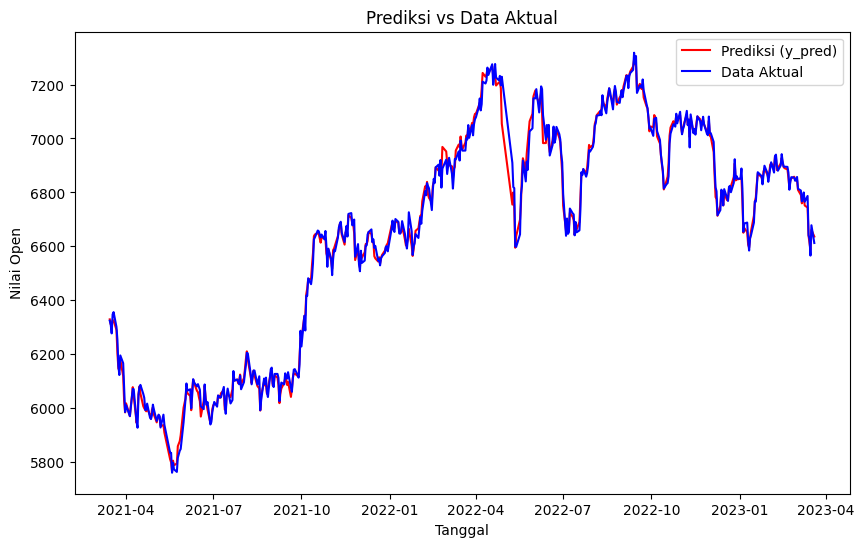

In [264]:
import matplotlib.pyplot as plt

# Plot hasil prediksi (y_pred) dan data aktual (train_data['Open(t)'])
plt.figure(figsize=(10, 6))
plt.plot(train_data.index[:500], y_pred.squeeze()[:500], label='Prediksi (y_pred)', color='red')
plt.plot(train_data.index[:500], train_data['Terakhir(t)'][:500], label='Data Aktual', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Open')
plt.title('Prediksi vs Data Aktual')
plt.legend()
plt.show()


In [265]:
scaled_val_data = scaler.transform(validation_data)

# Konversi data yang telah dinormalisasi kembali ke dalam DataFrame
scaled_val_data = pd.DataFrame(scaled_val_data, columns=validation_data.columns)

In [266]:
scaled_val_data

,Terakhir(t-3),Pembukaan(t-3),Tertinggi(t-3),Terendah(t-3),Terakhir(t-2),Pembukaan(t-2),Tertinggi(t-2),Terendah(t-2),Terakhir(t-1),Pembukaan(t-1),Tertinggi(t-1),Terendah(t-1),Terakhir(t),Pembukaan(t),Tertinggi(t),Terendah(t)
0,1.043358,1.057840,1.049399,1.050246,1.066931,1.048225,1.054145,1.055487,1.043348,1.073586,1.061738,1.051529,1.078246,1.081744,1.073540,1.079499
1,1.066931,1.048225,1.054145,1.055487,1.043348,1.073586,1.061738,1.051529,1.078246,1.081744,1.073540,1.079499,1.088075,1.083665,1.078893,1.081474
2,1.043348,1.073586,1.061738,1.051529,1.078246,1.081744,1.073540,1.079499,1.088075,1.083665,1.078893,1.081474,1.087328,1.088775,1.078443,1.073302
3,1.078246,1.081744,1.073540,1.079499,1.088075,1.083665,1.078893,1.081474,1.087328,1.088775,1.078443,1.073302,1.095090,1.094290,1.088604,1.090716
4,1.088075,1.083665,1.078893,1.081474,1.087328,1.088775,1.078443,1.073302,1.095090,1.094290,1.088604,1.090716,1.094520,1.087815,1.081481,1.081936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.898636,0.894156,0.891938,0.902387,0.894116,0.894942,0.888294,0.899184,0.894873,0.901209,0.895881,0.901966,0.901170,0.884875,0.892378,0.893142
356,0.894116,0.894942,0.888294,0.899184,0.894873,0.901209,0.895881,0.901966,0.901170,0.884875,0.892378,0.893142,0.884833,0.874262,0.874606,0.882537
357,0.894873,0.901209,0.895881,0.901966,0.901170,0.884875,0.892378,0.893142,0.884833,0.874262,0.874606,0.882537,0.874219,0.885271,0.876233,0.881674
358,0.901170,0.884875,0.892378,0.893142,0.884833,0.874262,0.874606,0.882537,0.874219,0.885271,0.876233,0.881674,0.885230,0.871183,0.877112,0.879078


In [267]:
y_val_scaled = scaled_val_data[["Terakhir(t)"]]  # Ambil kolom Open(t) sebagai target
X_val_scaled = scaled_val_data.drop(["Pembukaan(t)", "Terakhir(t)", "Tertinggi(t)", "Terendah(t)"], axis=1)

In [268]:

X_val = []
for i in range(timesteps):
    X_val.append(X_val_scaled.iloc[:, i*features:(i+1)*features].values)

# Ubah list menjadi array numpy
X_val = np.array(X_val)
X_val = X_val.transpose(1, 0, 2)
# Bentuknya menjadi (jumlah_sampel, timestep, feature)
print(X_val.shape)

(360, 3, 4)


In [269]:
y_val_pred = model_lstm.predict(X_val)

12/12 [==============================] - 0s 3ms/step


In [270]:
y_val_pred.squeeze()

array([7586.0625, 7633.8374, 7660.7617, 7682.629 , 7715.123 , 7702.616 ,
       7816.6743, 7828.5957, 7837.6416, 7818.9053, 7788.6104, 7768.0645,
       7747.367 , 7708.86  , 7691.188 , 7663.7754, 7647.2246, 7577.6074,
       7626.9585, 7633.6675, 7613.2124, 7629.805 , 7585.117 , 7561.8887,
       7528.376 , 7495.5737, 7489.366 , 7505.5674, 7474.1543, 7431.248 ,
       7418.8125, 7413.5586, 7379.2363, 7325.4014, 7274.424 , 7236.0605,
       7220.9854, 7177.2393, 7128.2   , 7214.9004, 7262.8774, 7263.522 ,
       7254.6035, 7269.727 , 7286.902 , 7264.1787, 7257.621 , 7278.673 ,
       7305.8853, 7304.2266, 7293.034 , 7248.491 , 7254.258 , 7273.505 ,
       7305.5767, 7314.4414, 7299.1074, 7283.828 , 7261.418 , 7252.4033,
       7244.239 , 7226.8867, 7172.584 , 7160.4688, 7101.1763, 7031.7695,
       6962.8984, 6915.3267, 6880.7295, 6879.54  , 6860.742 , 6781.482 ,
       6758.418 , 6807.6465, 6866.7495, 6856.8193, 6896.7583, 6895.4717,
       6967.5264, 6988.006 , 7087.825 , 7083.0244, 

In [271]:
validation_data['Terakhir(t)']

Tanggal
2024-09-27    7696.92
2024-09-26    7744.52
2024-09-25    7740.90
2024-09-24    7778.49
2024-09-23    7775.73
               ...   
2023-03-29    6839.44
2023-03-28    6760.33
2023-03-27    6708.93
2023-03-24    6762.25
2023-03-21    6691.61
Name: Terakhir(t), Length: 360, dtype: float64

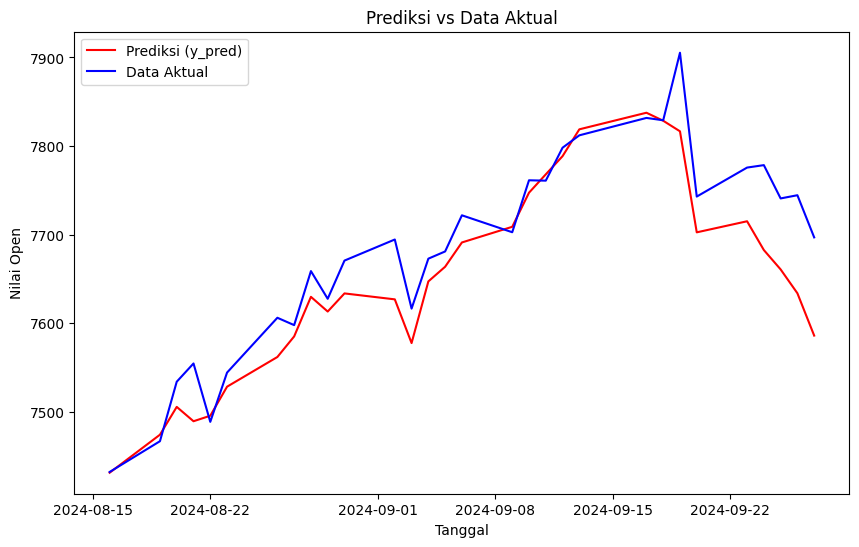

In [278]:
import matplotlib.pyplot as plt

# Plot hasil prediksi (y_pred) dan data aktual (train_data['Open(t)'])
plt.figure(figsize=(10, 6))
plt.plot(validation_data.index[:30], y_val_pred.squeeze()[:30], label='Prediksi (y_pred)', color='red')
plt.plot(validation_data.index[:30], validation_data['Terakhir(t)'][:30], label='Data Aktual', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Open')
plt.title('Prediksi vs Data Aktual')
plt.legend()
plt.show()


In [273]:
mse = np.mean((y_val_pred.squeeze() - validation_data['Terakhir(t)'])**2)

# Menghitung Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

MSE: 768.4215078199778
RMSE: 27.72041680458607


# Return

In [133]:
data['Return'] = data['Close'].pct_change()
data = data.dropna()  # Menghapus NaN hasil dari perhitungan pct_change


In [144]:
data.columns[5]

'Return'

In [145]:
def time_series_to_supervised(data, n_in=1, n_out=1, dropnan=True, var_names=None):
    """
    Mengubah data time series menjadi data supervised learning.

    Argumen:
    data: DataFrame atau Series, dataset time series yang akan diubah.
    n_in: int, jumlah timestep mundur sebagai input (X).
    n_out: int, jumlah timestep maju sebagai output (y).
    dropnan: bool, apakah akan menghapus baris dengan nilai NaN.
    var_names: list of str, nama variabel untuk setiap kolom.

    Returns:
    DataFrame yang sudah diubah menjadi format supervised learning.
    """
    if isinstance(data, pd.Series):
        data = data.to_frame()
        
    n_vars = data.shape[1]
    df = pd.DataFrame(data)
    cols, names = [], []
    
    # Input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        if var_names is None:
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        else:
            names += [(var_names[j] + '(t-%d)' % i) for j in range(n_vars)]
    
    # Output sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            if var_names is None:
                names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
            else:
                names += [(var_names[j] + '(t)') for j in range(n_vars)]
        else:
            if var_names is None:
                names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            else:
                names += [(var_names[j] + '(t+%d)' % i) for j in range(n_vars)]
    
    # Concatenate semua kolom
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    # Hapus baris dengan nilai NaN
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg


In [146]:
data_supervised_return = time_series_to_supervised(data['Return'], n_in=5, n_out=1, var_names=['Return'])


In [149]:
train_data_return = data_supervised_return[:lengh_train]
validation_data_return = data_supervised_return[lengh_train:]


In [150]:
scaled_train_data_return = scaler.fit_transform(train_data_return)
scaled_train_data_return = pd.DataFrame(scaled_train_data_return, columns=train_data_return.columns)
print(scaled_train_data_return.columns)


Index(['Return(t-5)', 'Return(t-4)', 'Return(t-3)', 'Return(t-2)',
       'Return(t-1)', 'Return(t)'],
      dtype='object')


In [151]:
scaled_train_data_return = scaler.fit_transform(train_data_return)
scaled_train_data_return = pd.DataFrame(scaled_train_data_return, columns=train_data_return.columns)

y_train_return_scaled = scaled_train_data_return[["Return(t)"]]
X_train_return_scaled = scaled_train_data_return.drop(["Return(t)"], axis=1)


In [152]:
timesteps =5
features = 1
X_train = []
for i in range(timesteps):
    X_train.append(X_train_return_scaled.iloc[:, i*features:(i+1)*features].values)

X_train = np.array(X_train).transpose(1, 0, 2)
print(X_train.shape)  # Output seharusnya berbentuk (jumlah_sampel, timestep, features)


(255, 5, 1)


In [153]:
model_lstm = Sequential()

# Adding layers
model_lstm.add(Bidirectional(LSTM(64, activation='relu', return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm.add(Dropout(0.1))
model_lstm.add(LSTM(64, activation='relu', return_sequences=False))
model_lstm.add(Dense(64))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='loss', patience=20, verbose=1, restore_best_weights=True)

# Fit the model
hist = model_lstm.fit(X_train, train_data_return['Return(t)'], 
                      epochs=200, 
                      batch_size=32,
                      callbacks=[early_stopping])

# Make predictions
y_pred = model_lstm.predict(X_train)



Epoch 1/200
8/8 [==============================] - 6s 9ms/step - loss: 2.9349e-04 - mse: 2.9349e-04
Epoch 2/200
8/8 [==============================] - 0s 15ms/step - loss: 1.1305e-04 - mse: 1.1305e-04
Epoch 3/200
8/8 [==============================] - 0s 10ms/step - loss: 6.8424e-05 - mse: 6.8424e-05
Epoch 4/200
8/8 [==============================] - 0s 8ms/step - loss: 5.0882e-05 - mse: 5.0882e-05
Epoch 5/200
8/8 [==============================] - 0s 7ms/step - loss: 4.4575e-05 - mse: 4.4575e-05
Epoch 6/200
8/8 [==============================] - 0s 7ms/step - loss: 4.2782e-05 - mse: 4.2782e-05
Epoch 7/200
8/8 [==============================] - 0s 8ms/step - loss: 3.9735e-05 - mse: 3.9735e-05
Epoch 8/200
8/8 [==============================] - 0s 8ms/step - loss: 3.9514e-05 - mse: 3.9514e-05
Epoch 9/200
8/8 [==============================] - 0s 8ms/step - loss: 4.0431e-05 - mse: 4.0431e-05
Epoch 10/200
8/8 [==============================] - 0s 7ms/step - loss: 3.9627e-05 - mse: 3.9627e-

In [154]:
# Calculate MSE and RMSE
mse = np.mean((y_pred.squeeze() - train_data_return['Return(t)'].values.squeeze())**2)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)



MSE: 4.020205125247256e-05
RMSE: 0.0063405087534418375


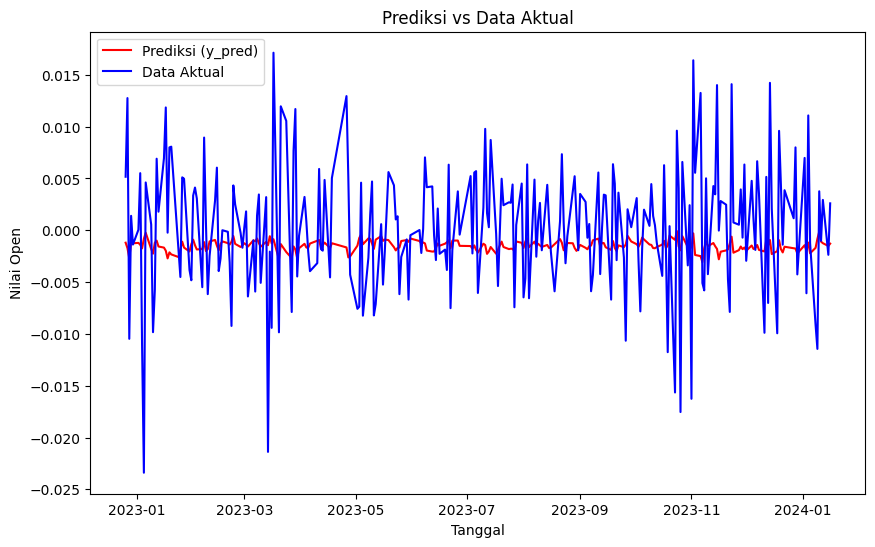

In [155]:
# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(train_data_return.index, y_pred.squeeze(), label='Prediksi (y_pred)', color='red')
plt.plot(train_data_return.index, train_data_return['Return(t)'], label='Data Aktual', color='blue')
plt.xlabel('Tanggal')
plt.ylabel('Nilai Open')
plt.title('Prediksi vs Data Aktual')
plt.legend()
plt.show()